# Sabrina del Rosal
### Capstone Project: Sprint 1
# Racehorses Risk of Injury Predictions 

#### Introduction #### 

Horse racing is a flourishing industry filled with fanatics who go to enjoy the race, bet, or be an inclusive part of it by owning racehorses. However, these horses undergo a lot of intense activity and can worsen their performance through time based on age, injury, and other factors. It is difficult to know exactly when and how a horse may begin to lower its winning chances throughout the races. A well performing predictive model could help provide valuable insights for trainers to prevent them from over pushing their horses causing performance decline and illness.

##### Big Idea #####
 
A machine learning model could use historical race data, biometrics records of individual racehorses, track intensity and/or conditions, and jockey statistics to help find patterns that may be associated with stress or risk of injury. By highlighting early indicators of fatigue, or poor performance, the model may be a crucial tool for racehorse trainers. This will be fairly similar to the injury-prevention models I have seen used for athletes playing basketball or football, for example. It can eventually allow trainers to have an idea as to when a horse might need to wean off racing for a bit in order to prevent massive injury that can lead to retirement. 
	Firstly, creating a model that can help predict winning positions will be in place to see if there are any trends in number of races a horse can feasible do well in. Then, biometric data will begin to play a part to see if height, weight, age, as well as pedigree plays significant roles in winning. We can look at conditions of track and weather as well to further investigate. If anything, I plan to begin with the most current year and create a model using that smaller dataset if needed to start small.
    

### Downloading Data

In [53]:
# import any necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
races_horses_df = pd.read_csv("../data/races_horses_df.csv")

In [55]:
races_horses_df.info()

# datetime column doesn't save 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105435 entries, 0 to 105434
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   rid          105435 non-null  int64  
 1   horseName    105435 non-null  object 
 2   age          105435 non-null  int64  
 3   saddle       105435 non-null  float64
 4   position     105435 non-null  int64  
 5   TR           105435 non-null  int64  
 6   OR           105435 non-null  int64  
 7   weight       105435 non-null  int64  
 8   res_win      105435 non-null  float64
 9   res_place    105435 non-null  int64  
 10  date         105435 non-null  object 
 11  hurdles      105435 non-null  int64  
 12  winningTime  105435 non-null  float64
 13  metric       105435 non-null  float64
 14  ncond        105435 non-null  int64  
 15  class        105435 non-null  int64  
 16  fences       105435 non-null  int64  
dtypes: float64(4), int64(11), object(2)
memory usage: 13.7+ MB


In [56]:
# convert it back to datetime

races_horses_df['date'] = pd.to_datetime(races_horses_df['date'])


## Exploratory Data Analysis

Action Plan :
1. visualize distributions
2. look at correlations with dependent variable
3. key variables --> older horse = higher injury ? track condition correlate with any injury likelihood ?
4. ??? do we need this  ?? develop hypotheses: higher race freq = higher injury , weight correlates with winning decline , track conditions affect performance ... 

In [57]:
# summary statistics to quickly look at what we have....

races_horses_df.describe()


,rid,age,saddle,position,TR,OR,weight,res_win,res_place,date,hurdles,winningTime,metric,ncond,class,fences
count,105435.000000,105435.000000,105435.000000,105435.000000,105435.000000,105435.000000,105435.000000,105435.000000,105435.000000,105435,105435.000000,105435.000000,105435.000000,105435.000000,105435.000000,105435.000000
mean,222561.609276,5.108436,7.374800,6.210442,54.505316,48.077669,61.252734,0.090615,0.259933,2000-07-01 19:51:22.509603072,2.354636,191.962105,2652.618277,4.240214,3.109290,2.054033
min,105.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2000-01-01 00:00:00,0.000000,0.000000,1005.000000,0.000000,0.000000,0.000000
25%,99790.000000,3.000000,3.000000,2.000000,50.000000,0.000000,55.000000,0.000000,0.000000,2000-04-23 00:00:00,0.000000,93.110000,1407.000000,1.000000,0.000000,0.000000
50%,243399.000000,5.000000,6.000000,5.000000,54.000000,55.000000,60.000000,0.000000,0.000000,2000-07-01 00:00:00,0.000000,160.800000,2413.000000,2.000000,4.000000,0.000000
75%,321025.000000,7.000000,10.000000,9.000000,57.000000,79.000000,68.000000,0.000000,1.000000,2000-09-16 00:00:00,0.000000,270.600000,3519.500000,8.000000,5.000000,0.000000
max,401362.000000,17.000000,40.000000,35.000000,186.000000,177.000000,80.000000,1.000000,1.000000,2000-12-31 00:00:00,16.000000,564.700000,7240.000000,18.000000,6.000000,32.000000
std,119016.940375,2.345969,5.041225,4.846308,22.360412,40.168695,7.815255,0.287062,0.438599,NaN,4.292229,107.115326,1251.601640,3.686826,2.166429,5.447060


In [58]:
# let's do some basic analysis now 

races_horses_df.head(5)

,rid,horseName,age,saddle,position,TR,OR,weight,res_win,res_place,date,hurdles,winningTime,metric,ncond,class,fences
0,270318,Peggy Barry,7,14.0,1,54,0,70,1.0,1,2000-01-01,0,281.3,3218.0,12,0,0
1,270318,Avondale Illusion,8,1.0,2,54,0,76,0.0,1,2000-01-01,0,281.3,3218.0,12,0,0
2,270318,Chermesina,6,8.0,3,54,0,72,0.0,1,2000-01-01,0,281.3,3218.0,12,0,0
3,270318,Banogue Lass,6,7.0,4,54,0,70,0.0,0,2000-01-01,0,281.3,3218.0,12,0,0
4,270318,Marico,7,3.0,5,54,0,73,0.0,0,2000-01-01,0,281.3,3218.0,12,0,0


In [59]:
# let's create our dependent variable column RISK OF INJURY
# if position is 0 then Risk of Injury column will be '1'

races_horses_df["RiskOfInjury"] = (races_horses_df["position"] == 0).astype(int)

In [60]:
# making sure it is only 0's and 1's

races_horses_df["RiskOfInjury"].unique()

array([0, 1])

In [61]:
# dependent variable (risk of injury) would be position

races_horses_df["RiskOfInjury"]

0         0
1         0
2         0
3         0
4         0
         ..
105430    0
105431    0
105432    0
105433    0
105434    1
Name: RiskOfInjury, Length: 105435, dtype: int64

### Visualize Distributions

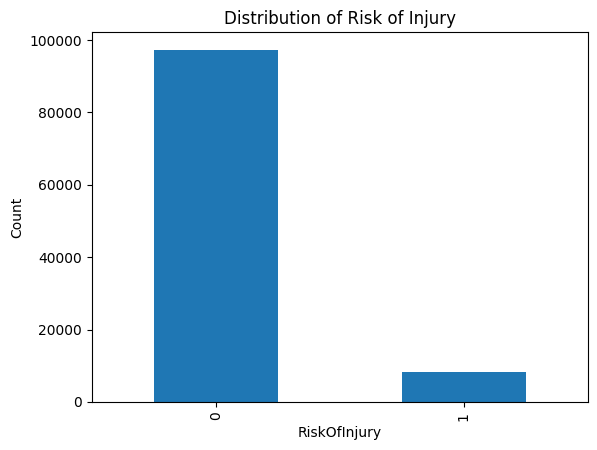

In [62]:
# checking its distribution, not normal ... will have to continue to look at assumptions -- better to do logistic perhaps

races_horses_df["RiskOfInjury"].value_counts().plot(kind='bar')

plt.title('Distribution of Risk of Injury')
plt.ylabel("Count")

plt.show()

In [63]:
# checking the proportions of negative and positive

races_horses_df["RiskOfInjury"].value_counts(normalize=True) * 100

RiskOfInjury
0    92.294779
1     7.705221
Name: proportion, dtype: float64

In [64]:
# checking counts of 0's and 1's

races_horses_df["RiskOfInjury"].value_counts()

RiskOfInjury
0    97311
1     8124
Name: count, dtype: int64

### Correlations to Dependent Variable

In [83]:
# grab the correlations

correlations = races_horses_df.drop(columns=["horseName"]).corr()["RiskOfInjury"].sort_values(ascending=False)

print(correlations)

# no high correlations between any and risk of injury....we will continue to work into statistical analysis later

RiskOfInjury    1.000000
winningTime     0.342595
metric          0.331778
fences          0.313660
age             0.255698
weight          0.255566
hurdles         0.120878
DaysRested      0.072768
ncond           0.064098
OR              0.012560
rid             0.008642
saddle          0.001116
TR             -0.003131
class          -0.034539
date           -0.061182
RacesRun       -0.070437
res_win        -0.091207
res_place      -0.171237
position       -0.370269
Name: RiskOfInjury, dtype: float64


### Key Variables

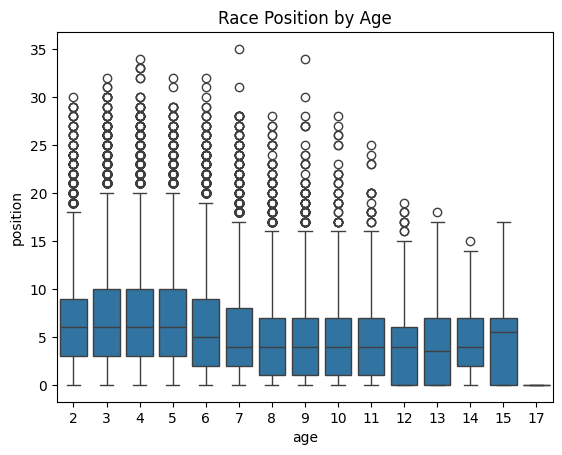

In [65]:
# let's look at injury risk by age 

sns.boxplot(x='age', y='position', data=races_horses_df)
plt.title("Race Position by Age")
plt.show()

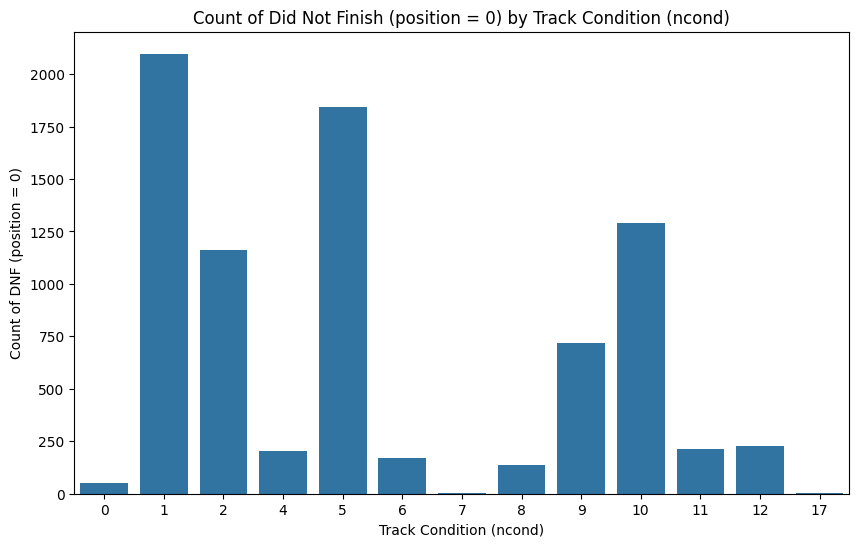

In [66]:
# race conditions with injury

# only cases where position == 0 (did not finish)
df_dnf = races_horses_df[races_horses_df["position"] == 0]

# plot
plt.figure(figsize=(10, 6))
sns.countplot(x="ncond", data=df_dnf, )

plt.title("Count of Did Not Finish (position = 0) by Track Condition (ncond)")
plt.xlabel("Track Condition (ncond)")
plt.ylabel("Count of DNF (position = 0)")

# Show the plot
plt.show()

#  1 is good condition , 5 is soft condition , 10 is good to soft condition
#  this can be because most races are on these conditions....let's see if we can get a better "truer" understanding

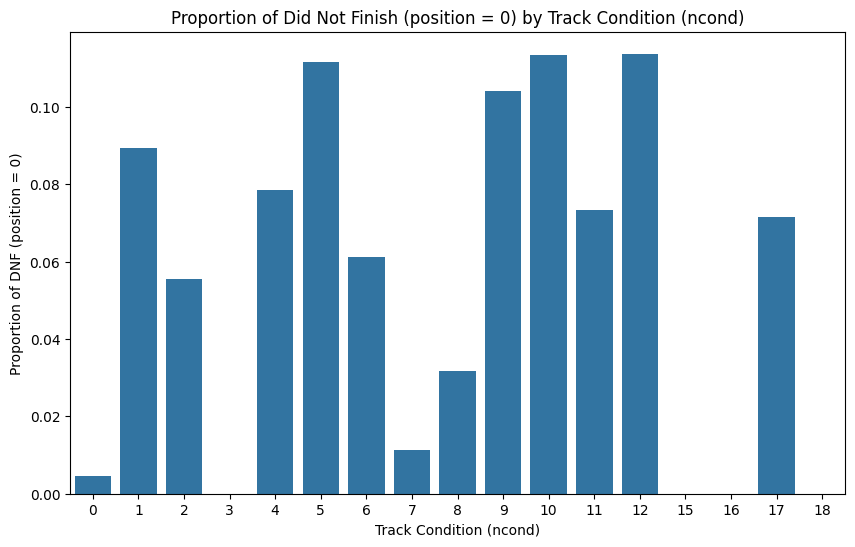

In [67]:
# going to do similar but calculating a proportion to use for better understanding

# total races per ncond
totalraces = races_horses_df["ncond"].value_counts()

# position 0 per ncond
totalDNF = races_horses_df[races_horses_df["position"] == 0]["ncond"].value_counts()

# proportion of DNF for each ncond
dnfProportion = (totalDNF / totalraces).sort_values(ascending=False)

# plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=dnfProportion.index, y=dnfProportion.values)

plt.title("Proportion of Did Not Finish (position = 0) by Track Condition (ncond)")
plt.xlabel("Track Condition (ncond)")
plt.ylabel("Proportion of DNF (position = 0)")

plt.show()

In [68]:
# let's see the hard numbers to better understand visual

dnfProportion

# 11% DNF for conditions 12 soft to heavy , 10 good to soft , 5 soft condition
# these are most important conditions for risk of injury 

ncond
12    0.113739
10    0.113363
5     0.111561
9     0.104143
1     0.089253
4     0.078560
11    0.073213
17    0.071429
6     0.061210
2     0.055487
8     0.031779
7     0.011236
0     0.004703
3          NaN
15         NaN
16         NaN
18         NaN
Name: count, dtype: float64

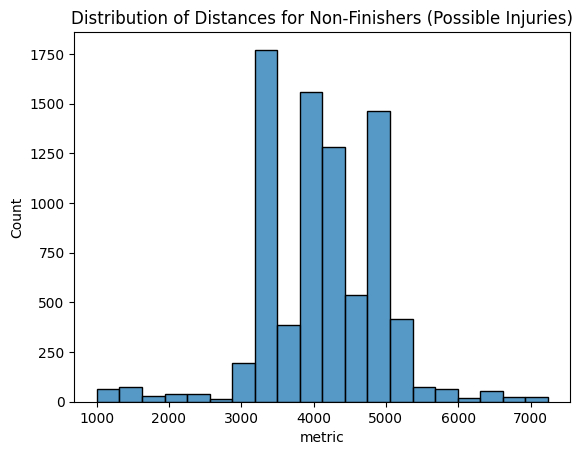

In [69]:
# distance with injury

sns.histplot(races_horses_df[races_horses_df['position'] == (0)]['metric'], bins=20)
plt.title("Distribution of Distances for Non-Finishers (Possible Injuries)")
plt.show()

In [70]:
races_horses_df.head(3)

,rid,horseName,age,saddle,position,TR,OR,weight,res_win,res_place,date,hurdles,winningTime,metric,ncond,class,fences,RiskOfInjury
0,270318,Peggy Barry,7,14.0,1,54,0,70,1.0,1,2000-01-01,0,281.3,3218.0,12,0,0,0
1,270318,Avondale Illusion,8,1.0,2,54,0,76,0.0,1,2000-01-01,0,281.3,3218.0,12,0,0,0
2,270318,Chermesina,6,8.0,3,54,0,72,0.0,1,2000-01-01,0,281.3,3218.0,12,0,0,0


In [71]:
# horses handicap distribution: Horses with higher handicap weights are usually stronger and more competitive, not necessarily heavier in body weight.

# how much are horses carrying? 

print(races_horses_df["weight"].describe())
print(races_horses_df["weight"].unique())

# mean = 61.25 kg 

count    105435.000000
mean         61.252734
std           7.815255
min           0.000000
25%          55.000000
50%          60.000000
75%          68.000000
max          80.000000
Name: weight, dtype: float64
[70 76 72 73 74 71 58 69 65 63 60 68 62 67 66 59 75 53 57 56 52 49 45 51
 61 64 54 55 50 48 46 47 77 78 79 80 44  0]


In [72]:
# average weight carried by horse

avg_weightcarried = races_horses_df.groupby("horseName")["weight"].mean().sort_values(ascending = False)

# top 10 

print(avg_weightcarried.head(10))

horseName
Sharimage           79.00
Punters Overhead    79.00
Ensign Ewart        78.25
Celtic Abbey I      78.00
Cherrynut           78.00
Secret Bay          78.00
Excise Man          78.00
Poucher             78.00
Mr Branigan         78.00
Kites Hardwicke     78.00
Name: weight, dtype: float64


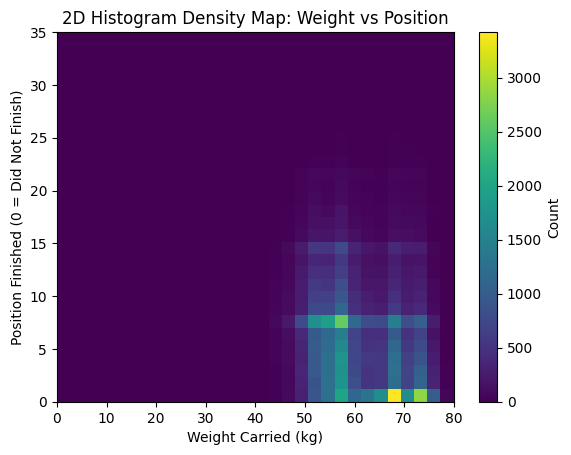

In [73]:
# weight vs finishing position

plt.hist2d(
    races_horses_df["weight"], 
    races_horses_df["position"], 
    bins=(30, 30), 
)
plt.colorbar(label="Count")
plt.xlabel("Weight Carried (kg)")
plt.ylabel("Position Finished (0 = Did Not Finish)")
plt.title("2D Histogram Density Map: Weight vs Position")
plt.show()

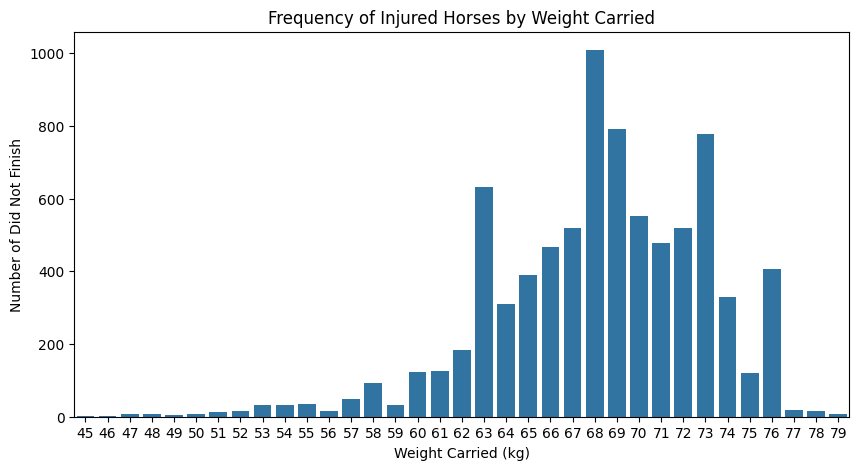

In [74]:
# look at a graph when position is only 0

failed_horses = races_horses_df[races_horses_df["position"] == 0]

# frequency per weight category

freq_weights = failed_horses["weight"].value_counts().sort_index()

# plot 

plt.figure(figsize=(10, 5))
sns.barplot(x=freq_weights.index, y=freq_weights.values)

plt.xlabel("Weight Carried (kg)")
plt.ylabel("Number of Did Not Finish")
plt.title("Frequency of Injured Horses by Weight Carried")

plt.show()

# 68 kg is the highest 

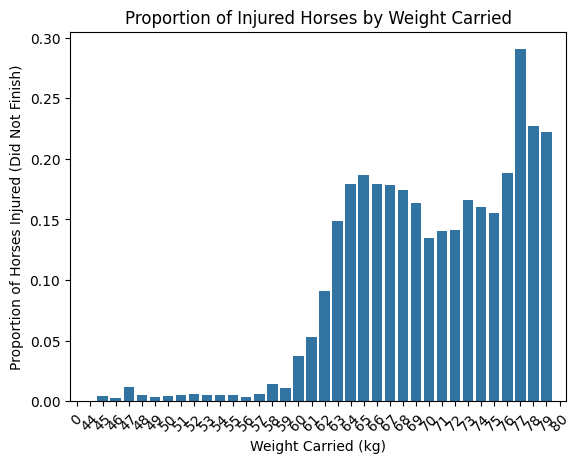

In [75]:
# same but in a proportion

failed_horses = races_horses_df[races_horses_df["position"] == 0]

# count injured horses per weight
injuredperweight = failed_horses["weight"].value_counts().sort_index()

# total horses per weight (including those that finished)
totalperweight = races_horses_df["weight"].value_counts().sort_index()

# calculate proportion
proportioninjured = (injuredperweight / totalperweight)

# plot
sns.barplot(x=proportioninjured.index, y=proportioninjured.values)

plt.xlabel("Weight Carried (kg)")
plt.ylabel("Proportion of Horses Injured (Did Not Finish)")
plt.title("Proportion of Injured Horses by Weight Carried")
plt.xticks(rotation = 45)
plt.show()


In [76]:
# horses carrying 77 kg or more
heavy_horses = races_horses_df[races_horses_df["weight"] >= 77]

print(heavy_horses)

           rid     horseName  age  saddle  position   TR   OR  weight  \
701     172869         Grief    7     1.0         1   95  111      77   
1719     16464     Polydamas    8     1.0         1  124  128      77   
5113    377306   Lively Buck    6     3.0         4   54    0      78   
6091    181398     Swagger I    4     1.0         1   74   57      78   
6890    100524   Red Striker    6     1.0         1  119  100      77   
...        ...           ...  ...     ...       ...  ...  ...     ...   
96141   290214  Running Moss    8     1.0         3   61   97      79   
96142   290214      Cromwell    5     2.0         4   35   96      78   
96803   270658    Le Sauvage    5     1.0         6   99  104      77   
97971   198740        Ludere    5     1.0         7   27   87      77   
100504   84312    Winter Man    6     2.0         3   54    0      78   

        res_win  res_place       date  hurdles  winningTime  metric  ncond  \
701         1.0          1 2000-01-03        

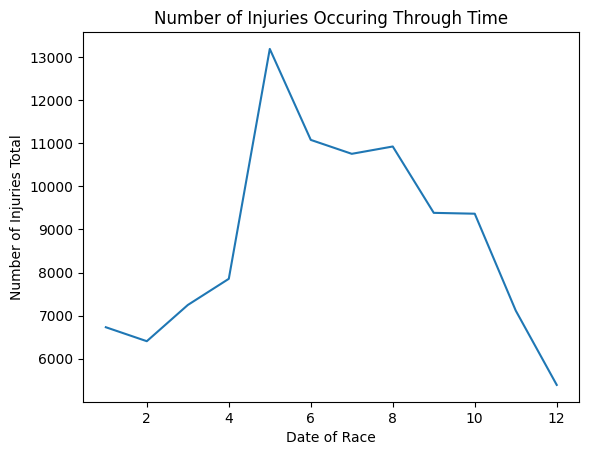

In [77]:
# times series injury trends over time 

injury_over_time = races_horses_df.groupby(races_horses_df["date"].dt.month).size().reset_index(name = "InjuryCount")

sns.lineplot( data = injury_over_time , x = "date" , y = "InjuryCount")
plt.title("Number of Injuries Occuring Through Time")
plt.xlabel("Date of Race")
plt.ylabel("Number of Injuries Total")
plt.show()

# May has highest spike of injuries (summer overall) ; may be due to most races occuring in summer? let's do porportion to see


Text(0, 0.5, 'Proportion of Injuries Occurred')

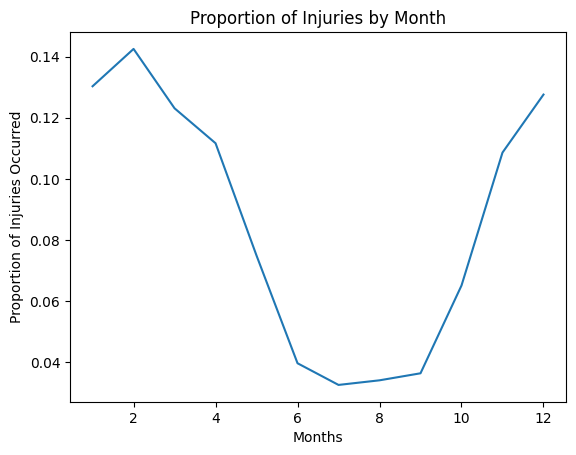

In [78]:
# proportional injury rate by month

# injured by month
injured_over_time = races_horses_df.groupby(races_horses_df["date"].dt.month)["RiskOfInjury"].sum().reset_index(name = "InjuryCount")

# total by month
raced_over_time = races_horses_df.groupby(races_horses_df["date"].dt.month)["horseName"].count().reset_index(name = "TotalHorsesRaced")

# proportion 
injury_frequency = pd.merge(injured_over_time, raced_over_time, on="date")
injury_frequency["InjuryFrequency"] = injury_frequency["InjuryCount"] / injury_frequency["TotalHorsesRaced"]

# plot
sns.lineplot(data=injury_frequency, x="date", y="InjuryFrequency")
plt.title("Proportion of Injuries by Month")
plt.xlabel("Months")
plt.ylabel("Proportion of Injuries Occurred")

# now we see that ACTUALLY injuries occur mostly towarads the winter months!! important discovery!!


In [79]:
# let's take a look at dataframe again just to reset

races_horses_df.head(4)

,rid,horseName,age,saddle,position,TR,OR,weight,res_win,res_place,date,hurdles,winningTime,metric,ncond,class,fences,RiskOfInjury
0,270318,Peggy Barry,7,14.0,1,54,0,70,1.0,1,2000-01-01,0,281.3,3218.0,12,0,0,0
1,270318,Avondale Illusion,8,1.0,2,54,0,76,0.0,1,2000-01-01,0,281.3,3218.0,12,0,0,0
2,270318,Chermesina,6,8.0,3,54,0,72,0.0,1,2000-01-01,0,281.3,3218.0,12,0,0,0
3,270318,Banogue Lass,6,7.0,4,54,0,70,0.0,0,2000-01-01,0,281.3,3218.0,12,0,0,0


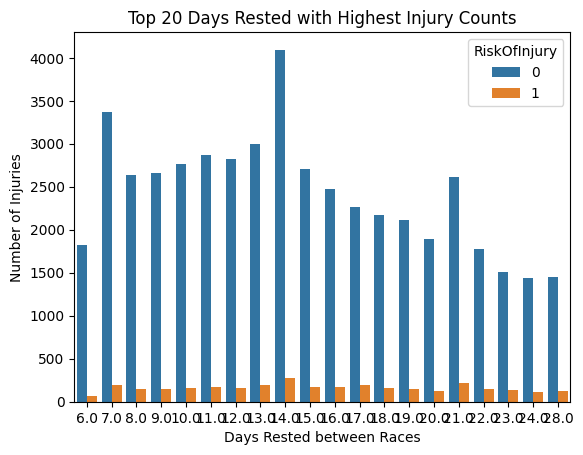

In [80]:
# horse's rest time between 2 races

races_horses_df["DaysRested"] = races_horses_df.groupby("horseName")["date"].diff().dt.days

injury_counts = races_horses_df.groupby(['DaysRested' , 'RiskOfInjury']).size().reset_index(name="InjuryCounts")

# original graph is too large so limiting to top 20 

injury_by_rest_total = injury_counts.groupby('DaysRested')['InjuryCounts'].sum().reset_index()

top20 = injury_counts.nlargest(20 , 'InjuryCounts').reset_index(drop=True)

top20data = injury_counts[injury_counts['DaysRested'].isin(top20['DaysRested'])]

# plot

sns.barplot(data = top20data , x = "DaysRested" , y = "InjuryCounts", hue = "RiskOfInjury")
plt.title("Top 20 Days Rested with Highest Injury Counts")
plt.xlabel("Days Rested between Races")
plt.ylabel("Number of Injuries")
plt.show()

# pattern of mostly resting for intervals of 7 days , 14 days , 21 days 
# perhaps look at percentages of injured in these intervals ?

In [81]:
# do horses that run more races have a higher risk of injury ?

# sort data by horse and race date
races_horses_df = races_horses_df.sort_values(by=["horseName", "date"])

# cumulative race count per horse
races_horses_df["RacesRun"] = races_horses_df.groupby("horseName").cumcount() + 1  # starts from 1

# group by 'horseName' to get total races run and injury risk
agg_horses = races_horses_df.groupby('horseName').agg(TotalRaces=('RacesRun', 'max'), InjuryRisk=('RiskOfInjury', 'max')).reset_index()

print(agg_horses.head(10))

          horseName  TotalRaces  InjuryRisk
0         A And Jay           1           0
1        A B My Boy           5           0
2   A Bit Special I           1           0
3       A Bob Light           3           0
4         A C Azure           7           0
5    A Chef Too Far           1           0
6  A Day On The Dub          19           1
7  A Friend Of Mine           3           0
8  A Lad From Abbey           1           0
9  A Lark Ascending           1           1


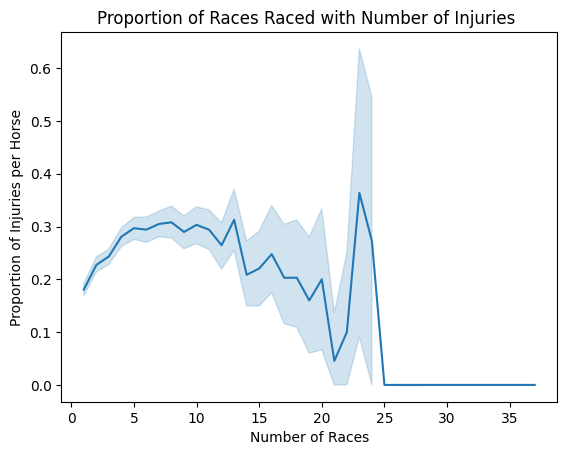

In [82]:
# plotting risk of injury based on more races ?

sns.lineplot(data = agg_horses , x = "TotalRaces" , y = "InjuryRisk")
plt.title("Proportion of Races Raced with Number of Injuries ")
plt.xlabel("Number of Races")
plt.ylabel("Proportion of Injuries per Horse")
plt.show()
